In [1]:
%matplotlib inline

from scipy import signal
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os.path as path
output_dir = '/home/eric/Phd_thesis/figures/'
# # # Using seaborn's style
# # plt.style.use('seaborn')

# # width = 345

# nice_fonts = {
#         # Use LaTeX to write all text
#         "text.usetex": True,
#         "font.family": "serif",
#         # Use 10pt font in plots, to match 10pt font in document
#         "axes.labelsize": 10,
#         "font.size": 10,
#         # Make the legend/label fonts a little smaller
#         "legend.fontsize": 8,
#         "xtick.labelsize": 8,
#         "ytick.labelsize": 8,
# }

# mpl.rcParams.update(nice_fonts)
# print("Your style sheets are located at: {}".format(path.join(mpl.__path__[0], 'mpl-data', 'stylelib')))
from my_plot import set_size
plt.style.use('tex')
output_dir = '/home/eric/Phd_thesis/figures/'

# Symbols and Abbreviations

\nomenclature{$\mathcal{F}\{\cdot\}$}{Fourier transform}

\nomenclature{$\mathcal{F^{-1}}\{\cdot\}$}{Inverse Fourier transform}

\nomenclature{$\sigma$}{Spread of 1-d Gaussian function}

\nomenclature{$\alpha$}{Sharpness (Gabor function major axis)}

\nomenclature{$\beta$}{Sharpness (Gabor function minor axis)}

\nomenclature{$\gamma$}{Sharpness of Gabor filter (major axis)}

\nomenclature{$\eta$}{Sharpness of Gabor filter (minor axis)}

\nomenclature{$\theta$}{Orientation angle of Gabor filter}

\nomenclature{$h(t)$}{1-d signal}

\nomenclature{$h(x,y)$}{2-d signal}

\nomenclature{$\phi$}{Phase shift Gabor filter}

\nomenclature{$g(t)$}{1-d Gabor filter in time domain}

\nomenclature{$g(t; f)$}{1-d Gabor filter in time domain at frequency $f$}

\nomenclature{$g(n)$}{Discrete 1-d Gabor filter in time domain}

\nomenclature{$g(x, y)$}{2-d Gabor filter in spatial domain}

\nomenclature{$g(x, y; f, \theta)$}{2-d Gabor filter in spatial domain t frequency $f$ and angle $\theta$}

\nomenclature{$g^{\ast}(t)$}{Complex conjugate of $g(t)$}

\nomenclature{$g(t){\ast}h(t)$}{Convolution of two 1-d functions in time}

\nomenclature{$\Delta$}{Uncertainty}

\nomenclature{$G(f)$}{1-d Gabor filter in frequency domain}

\nomenclature{$G(u, v)$}{2-d Gabor filter in frequency domain}

\nomenclature{$f$}{Frequency}

\nomenclature{$\omega$}{Radial frequency}

\nomenclature{$f_{0}$}{Frequency of Gabor function}

\nomenclature{$j$}{imaginary unit}

\nomenclature{$r(t; f)$}{Response of 1-d Gabor filter}

\nomenclature{$r(x, y; f, \theta)$}{Response of 2-d Gabor filter}

\nomenclature{$t$}{Time}

\nomenclature{$t_{0}$}{Location of Gabor function}





# Non-stationary color texture images


## The Heisenberg uncertainty principle in signal and image processing

The uncertainty principle is one of the most famous ideas in quantum mechanics. An early incarnation of the uncertainty principle appeared in a 1927 paper by the German physicist Heisenberg. The uncertainty principle says that we cannot measure the position $(x)$ and the momentum $(p)$ of a particle with absolute precision. The more accurately we know one of these values, the less accurately we know the other. 

However, the uncertainty principle in the field of quantum mechanics is just a particular case of a more general compromise that appears in many cases of everyday life involving waves. The central idea is connected with the interrelation between frequency and duration. For example, in the case of sound waves, if we want to identify the frequency of a musical note, the shorter the sound lasts in time, the less certain we can be about the exact frequency of the sound; to find a more defined frequency, it would be necessary to listen to the sound for a longer time. In the language of signal processing, we can say that a short signal correlates highly with a wide range of frequencies and only wide signals correlate with a short range of frequencies. Formally this is expressed as

\begin{equation}\label{eq:uncertainty_principle_rad}
	\Delta t\Delta \omega \geq \frac{1}{2}
\end{equation}

where $\Delta t$ is the duration of the signal in the time domain and $\Delta \omega$ is the bandwidth of the signal in the frequency domain (CITE). The uncertainty principle then says: the product of the spectral bandwidth multiplied with the time duration of the signal cannot be less than a certain minimum value. Considering the bandwidth of the signal in terms of frequency as $\Delta f$ where $\omega = 2\pi f$, the uncertainty principle is stated as 

\begin{equation}\label{eq:uncertainty_principle_freq}
	\Delta t\Delta f \geq \frac{1}{4\pi}
\end{equation}

The Heisenberg uncertainty principle in the field of signal processing and image processing can be mathematically proved by the \textbf{Parseval's theorem}

\begin{equation}\label{eq:parseval_theorem}
	\int_{-\infty}^{\infty} h(t)^2 dt =  \int_{-\infty}^{\infty} |H(f)|^2 df
\end{equation}

where $h(t)$ is a function and $H(f)$ its the Fourier transform. 

The \textbf{energy content} of the signal described by $h(t)$ is defined as:

\begin{equation}\label{eq:energy_content_time}
    E_{\infty} \equiv \int_{-\infty}^{\infty}  h(t)^2 dt
\end{equation}


From the Parseval's identity this may be written as:

\begin{equation}\label{eq:energy_content_frequency}
    E_{\infty} =  \int_{-\infty}^{\infty} |H(f)|^2 df
\end{equation}

The \textbf{time dispersion} of the signal is given by

\begin{equation}\label{eq:time_dispersion_no_centered}
    (\Delta t)^2 \equiv \frac{1}{E_{\infty}} \int_{-\infty}^{\infty} (t-t_{0})^2 h(t)^2 dt
\end{equation}

where if we shift the \textbf{center of gravity} of the signal to the origin $t_{0}=0$, then

\begin{equation}\label{eq:time_dispersion}
    (\Delta t)^2 = \frac{1}{E_{\infty}} \int_{-\infty}^{\infty} t^2 h(t)^2 dt
\end{equation}

In an analogous way, the \textbf{spectral bandwidth} of the signal is given by

\begin{equation}\label{eq:spectral_bandwidth_no_centered}
    (\Delta f)^2 \equiv \frac{1}{E_{\infty}} \int_{-\infty}^{\infty} (f-f_{0})^2 |H(f)|^2 df
\end{equation}

where if we consider an \textbf{spectral center of gravity}, $f_{0}=0$

\begin{equation}\label{eq:spectral_bandwidth}
    (\Delta f)^2 = \frac{1}{2 \pi E_{\infty}} \int_{-\infty}^{\infty} f^2 |H(f)|^2 df 
\end{equation}

If $h'(t)$ is the derivative of the function, its Fourier transform is $j2\pi f H(f)$. By applying the Parseval's theorem to the Fourier pair $h'(t)\longleftrightarrow j2\pi f H(f)$ we obtain:

\begin{equation}\label{eq:applyed_parseval_theorem}
    2 \pi \int_{-\infty}^{\infty} f^2 |H(f)|^2 df =  \int_{-\infty}^{\infty} h'(t)^2 dt
\end{equation}

By substituting in equation $(\eqref{eq:spectral_bandwidth})$, we have:

\begin{equation}\label{eq:spectral_bandwidth2}
    (\Delta f)^2 = \frac{1}{4 \pi^{2} E_{\infty}} \int_{-\infty}^{\infty} h'(t)^2 dt
\end{equation}

We use equations $(\eqref{eq:time_dispersion})$ and $\eqref{eq:spectral_bandwidth2}$ to calculate:

\begin{equation}\label{eq:time_bandwidth_disp}
    (\Delta t)^2(\Delta f)^2 = \frac{1}{4 \pi^{2} E_{\infty}^{2}} \int_{-\infty}^{\infty} t^2f(t)^2 dt \int_{-\infty}^{\infty}f'(t)^2 dt
\end{equation}

Applying the Schwartz's inequality for the integrals on the right-hand side of $\eqref{eq:time_bandwidth_disp}$:

\begin{equation}\label{eq:schwartz_inequality}
    \int_{-\infty}^{\infty}t h(t)^2 dt \int_{-\infty}^{\infty}h'(t)^2 dt  \geq \biggr\rvert \int_{-\infty}^{\infty}t h(t)h'(t)^2 dt \biggr\rvert^{2}
\end{equation}


We may integrate by parts the integral on the right-hand side of $\eqref{eq:schwartz_inequality}$

\begin{equation}\label{eq:integr_by_parts}
    \int_{-\infty}^{\infty}t h(t) h'(t)^2 dt =  \frac{1}{2}t h(t)^2 \biggr\rvert_{-\infty}^{\infty} - \frac{1}{2} \int_{-\infty}^{\infty}h(t)^2 dt
\end{equation}

If $\lim_{t\rightarrow \infty} t h(t)^2=0$, the first term on the right-hand side of $\eqref{eq:integr_by_parts}$ vanishes and from equation $\eqref{eq:energy_content_time}$ we have

\begin{equation}\label{eq:energy_content_developped}
    \int_{-\infty}^{\infty} t h(t)h'(t) dt = -\frac{1}{2} E_{\infty}
\end{equation}

If we use this into $\eqref{eq:schwartz_inequality}$ and then into $\eqref{eq:time_bandwidth_disp}$ we obtain:

\begin{equation}\label{eq:}
   (\Delta t)^2(\Delta f)^2 \geq \frac{1}{16\pi^{2}} 
\end{equation}

This is the mathematical statement of the uncertainty principle in signal processing.

The uncertainty principle shows that the size, the shape and the shift of the window through which we make measurements affects the accuracy of what we compute. For example, let us consider a signal $f(t)$ with Fourier transform $F(\omega)$. Let us assume that we observe only a part of the signal through a window $w(t)$, with Fourier transform $W(\omega)$ centered at $t_0$

\begin{equation}\label{eq:uncertainty_principle2}
    h(t) = f(t)w(t-t_0)
\end{equation}



Due to the shifting property of the Fourier transform, the Fourier transform of the window is $e^{-j\omega t_0}W(\omega)$. Since the window multiplies the signal, the Fourier transform of the window is convolved with the Fourier transform of the signal. Therefore, the Fourier transform of what we observe is given by:

\begin{equation}\label{eq:short_time_fourier_transform}
    H(\omega) = \int_{-\infty}^{\infty}F(\omega - u)e^{-ju t_0}W(u) du
\end{equation}


In general $H(\omega)$ is different from $G(\omega)$ and depends on the locality of the window $t_0$.

### Examples

Consider a signal $f(t)=A \sin \omega_{0} t$, where $A$ is a positive constant, and a window $w(t)$ defined by a Gaussian function. A Gaussian window is infinite in extent, so it is characterized by its locality $t_0$ and its standard deviation, which in this context is also called \textit{spread} and is denoted by $\sigma$. 

\begin{equation}\label{eq:1d_gaussian_function}
    w(t)=e^{\frac{(t-t_0)^2}{2\sigma^2}}
\end{equation}



Text(0,0.5,'Phase of $H(f)$')

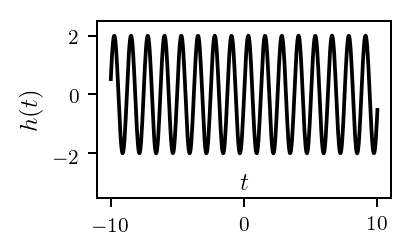

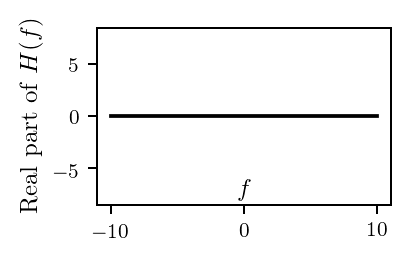

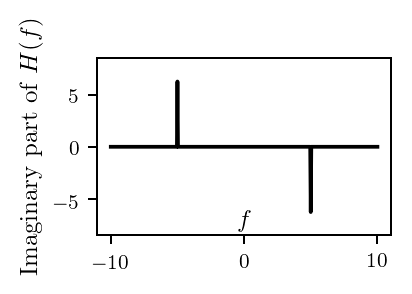

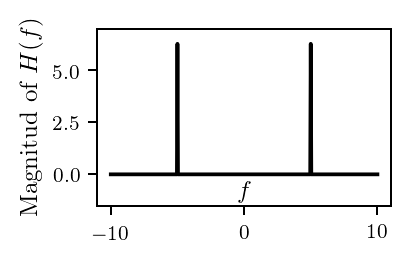

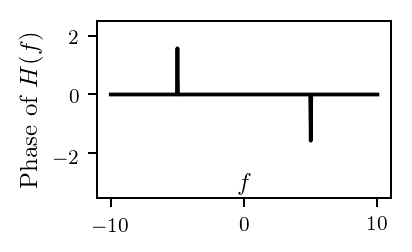

In [23]:
# Plot n. 1  sin signal and its fourier components
A = 2.

freq = 1.
omega = 5. #2*np.pi*freq
t = np.linspace(start=-10, stop=10, endpoint=True, num=501)
h = A * np.sin(omega * t)



pos_omega1 = np.where((omega-t)==0)[0][0]
pos_omega2 = np.where((omega+t)==0)[0][0]
H = (-1j * A * np.pi * signal.unit_impulse(len(t), pos_omega1) )+ (1j * A * np.pi * signal.unit_impulse(len(t), pos_omega2))

width_pt = 506.45#'thesis'# 

plt.figure(figsize=set_size(width=width_pt, fraction=0.3), dpi=180)
plt.plot(t, h, 'k')
plt.ylim(-3.5, 2.5)
plt.xlabel(r'$t$', labelpad=-25)
plt.ylabel(r'$h(t)$')
# plt.savefig(output_dir + 'sin_signal.pdf', format='pdf', bbox_inches='tight')

plt.figure(figsize=set_size(width=width_pt, fraction=0.3), dpi=180)
plt.plot(t, np.real(H), 'k')
plt.ylim(-8.5, 8.5)
plt.xlabel(r'$f$', labelpad=-25)
plt.ylabel(r'Real part of $H(f)$')
# plt.savefig(output_dir + 'real_sin_signal.pdf', format='pdf', bbox_inches='tight')

plt.figure(figsize=set_size(width=width_pt, fraction=0.3), dpi=180)
plt.plot(t, np.imag(H), 'k')
plt.ylim(-8.5, 8.5)
plt.xlabel(r'$f$', labelpad=-25)
plt.ylabel(r'Imaginary part of $H(f)$')
# plt.savefig(output_dir + 'imag_sin_signal.pdf', format='pdf', bbox_inches='tight')

plt.figure(figsize=set_size(width=width_pt, fraction=0.3), dpi=180)
plt.plot(t, np.abs(H), 'k')
plt.ylim(-1.5, 7)
plt.xlabel(r'$f$', labelpad=-25)
plt.ylabel(r'Magnitud of $H(f)$')
# plt.savefig(output_dir + 'mag_sin_signal.pdf', format='pdf', bbox_inches='tight')

plt.figure(figsize=set_size(width=width_pt, fraction=0.3), dpi=180)
plt.plot(t, np.angle(H), 'k')
plt.ylim(-3.5, 2.5)
plt.xlabel(r'$f$', labelpad=-25)
plt.ylabel(r'Phase of $H(f)$')
# plt.savefig(output_dir + 'phase_sin_signal.pdf', format='pdf', bbox_inches='tight')



In [22]:
5/(2*np.pi)

0.7957747154594768

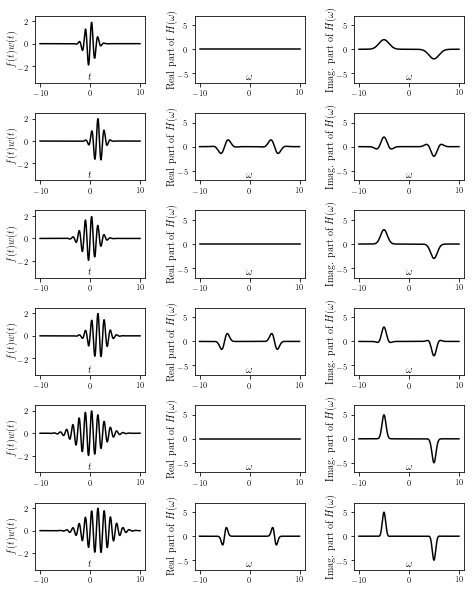

In [11]:
# Plot n. 2  windowed (gaussian) sin signal and its fourier components
A = 2.
omega = 5.
freq = 1.25
t = np.linspace(start=-10, stop=10, endpoint=True, num=501)
f = A * np.sin(omega * t)

t0 = [0., 1.6]
sigma = [1.0, 1.5, 2.5]
figure_size = set_size(width_pt, subplots=(6, 3))

fig, ax = plt.subplots(6, 3, figsize=(figure_size[0], figure_size[1]+0.5))
ff = 0
for jj in range(len(sigma)):
    for ii in range(len(t0)):
        
        g = np.exp(-(t-t0[ii])**2/(2*sigma[jj]**2))
        h = f*g
        
        const = (A*sigma[jj]*np.sqrt(np.pi))/np.sqrt(np.pi)
        exp_const_neg = np.exp(-((sigma[jj]**2 * (omega-t)**2)/2.) + 1j*t0[ii]*((omega-t)))
        exp_const_pos = np.exp(-((sigma[jj]**2 * (omega+t)**2)/2.) - 1j*t0[ii]*((omega+t)) )
        H = -1j*const * exp_const_neg + 1j*const * exp_const_pos
        
        ax[ff, 0].plot(t, h, 'k')
        ax[ff, 0].set_ylim(-3.5, 2.5)
        ax[ff, 0].set_xlabel(r'$t$', labelpad=-25)
        ax[ff, 0].set_ylabel(r'$f(t)w(t)$', labelpad=0.1)

        ax[ff, 1].plot(t, np.real(H), 'k')
        ax[ff, 1].set_ylim(-7, 7)
        ax[ff, 1].set_xlabel(r'$\omega$', labelpad=-25)
        ax[ff, 1].set_ylabel(r'Real part of $H(\omega)$', labelpad=0.1)
        
        ax[ff, 2].plot(t, np.imag(H), 'k')
        ax[ff, 2].set_ylim(-7, 7)
        ax[ff, 2].set_xlabel(r'$\omega$', labelpad=-25)
        ax[ff, 2].set_ylabel(r'Imag. part of $H(\omega)$', labelpad=0.1)
        ff += 1

fig.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.45, wspace=0.45)
# plt.savefig(output_dir + 'sin_gauss_real_imag.pdf', format='pdf', bbox_inches='tight')

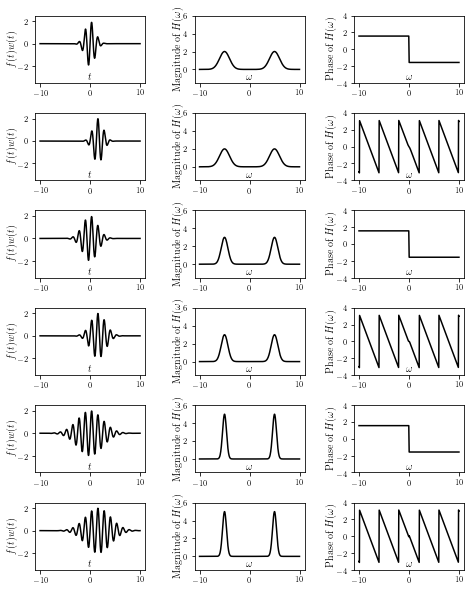

In [4]:
fig, ax = plt.subplots(6, 3, figsize=(figure_size[0], figure_size[1]+0.5))
ff = 0
for jj in range(len(sigma)):
    for ii in range(len(t0)):
        
        g = np.exp(-(t-t0[ii])**2/(2*sigma[jj]**2))
        h = f*g
        
        const = (A*sigma[jj]*np.sqrt(np.pi))/np.sqrt(np.pi)
        exp_const_neg = np.exp(-((sigma[jj]**2 * (omega-t)**2)/2.) + 1j*t0[ii]*((omega-t)))
        exp_const_pos = np.exp(-((sigma[jj]**2 * (omega+t)**2)/2.) - 1j*t0[ii]*((omega+t)) )
        H = -1j*const * exp_const_neg + 1j*const * exp_const_pos
        
        ax[ff, 0].plot(t, h, 'k')
        ax[ff, 0].set_ylim(-3.5, 2.5)
        ax[ff, 0].set_xlabel(r'$t$', labelpad=-25)
        ax[ff, 0].set_ylabel(r'$f(t)w(t)$', labelpad=0.1)

        ax[ff, 1].plot(t, np.abs(H), 'k')
        ax[ff, 1].set_ylim(-1.5, 6)
        ax[ff, 1].set_xlabel(r'$\omega$', labelpad=-25)
        ax[ff, 1].set_ylabel(r'Magnitude of $H(\omega)$', labelpad=0.1)
        
        ax[ff, 2].plot(t, np.angle(H), 'k')
        ax[ff, 2].set_ylim(-4, 4)
        ax[ff, 2].set_xlabel(r'$\omega$', labelpad=-25)
        ax[ff, 2].set_ylabel(r'Phase of $H(\omega)$', labelpad=0.1)
        ff += 1

fig.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.45, wspace=0.45)
# plt.savefig(output_dir + 'sin_gauss_mag_phase.pdf', format='pdf', bbox_inches='tight')

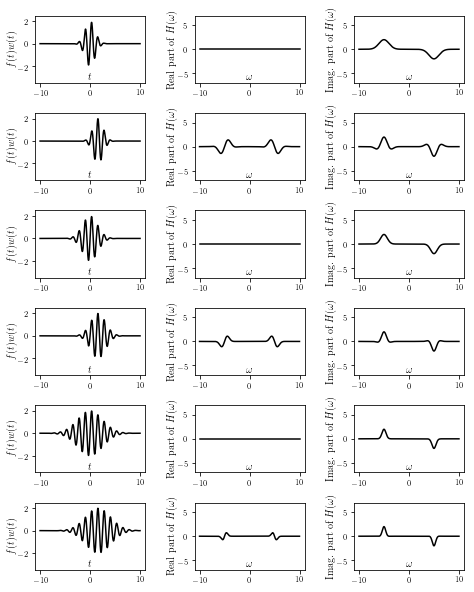

In [5]:
fig, ax = plt.subplots(6, 3, figsize=(figure_size[0], figure_size[1]+0.5))
ff = 0
for jj in range(len(sigma)):
    for ii in range(len(t0)):
        
        g = np.exp(-(t-t0[ii])**2/(2*sigma[jj]**2))
        h = f*g
        
        const = (A*sigma[jj]*np.sqrt(np.pi))/np.sqrt(np.pi)
        exp_const_neg = np.exp(-((sigma[jj]**2 * (omega-t)**2)/2.) + 1j*t0[ii]*((omega-t)))
        exp_const_pos = np.exp(-((sigma[jj]**2 * (omega+t)**2)/2.) - 1j*t0[ii]*((omega+t)) )
        H = -1j*const * exp_const_neg + 1j*const * exp_const_pos
        
        H /= sigma[jj]
        
        ax[ff, 0].plot(t, h, 'k')
        ax[ff, 0].set_ylim(-3.5, 2.5)
        ax[ff, 0].set_xlabel(r'$t$', labelpad=-25)
        ax[ff, 0].set_ylabel(r'$f(t)w(t)$', labelpad=0.1)

        ax[ff, 1].plot(t, np.real(H), 'k')#/sigma[jj]
        ax[ff, 1].set_ylim(-7, 7)
        ax[ff, 1].set_xlabel(r'$\omega$', labelpad=-25)
        ax[ff, 1].set_ylabel(r'Real part of $H(\omega)$', labelpad=0.1)
        
        ax[ff, 2].plot(t, np.imag(H), 'k')#/sigma[jj]
        ax[ff, 2].set_ylim(-7, 7)
        ax[ff, 2].set_xlabel(r'$\omega$', labelpad=-25)
        ax[ff, 2].set_ylabel(r'Imag. part of $H(\omega)$', labelpad=0.1)
        ff += 1

fig.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.45, wspace=0.45)
# plt.savefig(output_dir + 'sin_gauss_real_imag.pdf', format='pdf', bbox_inches='tight')

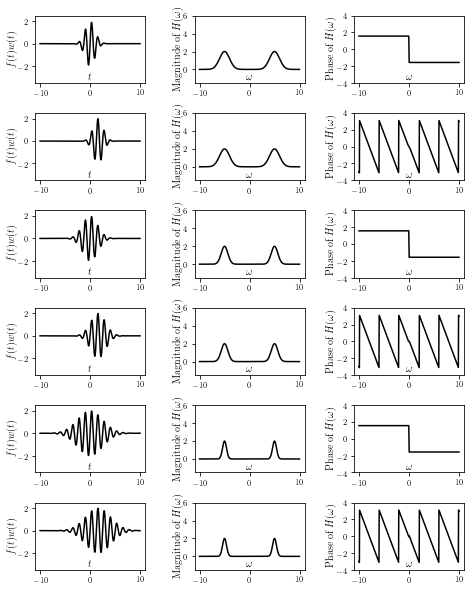

In [6]:
fig, ax = plt.subplots(6, 3, figsize=(figure_size[0], figure_size[1]+0.5))
ff = 0
for jj in range(len(sigma)):
    for ii in range(len(t0)):
        
        g = np.exp(-(t-t0[ii])**2/(2*sigma[jj]**2))
        h = f*g
        
        const = (A*sigma[jj]*np.sqrt(np.pi))/np.sqrt(np.pi)
        exp_const_neg = np.exp(-((sigma[jj]**2 * (omega-t)**2)/2.) + 1j*t0[ii]*((omega-t)))
        exp_const_pos = np.exp(-((sigma[jj]**2 * (omega+t)**2)/2.) - 1j*t0[ii]*((omega+t)) )
        H = -1j*const * exp_const_neg + 1j*const * exp_const_pos
        
        H /= sigma[jj]

        ax[ff, 0].plot(t, h, 'k')
        ax[ff, 0].set_ylim(-3.5, 2.5)
        ax[ff, 0].set_xlabel(r'$t$', labelpad=-25)
        ax[ff, 0].set_ylabel(r'$f(t)w(t)$', labelpad=0.1)

        ax[ff, 1].plot(t, np.abs(H), 'k')#/sigma[jj]
        ax[ff, 1].set_ylim(-1.5, 6)
        ax[ff, 1].set_xlabel(r'$\omega$', labelpad=-25)
        ax[ff, 1].set_ylabel(r'Magnitude of $H(\omega)$', labelpad=0.1)
        
        ax[ff, 2].plot(t, np.angle(H), 'k')
        ax[ff, 2].set_ylim(-4, 4)
        ax[ff, 2].set_xlabel(r'$\omega$', labelpad=-25)
        ax[ff, 2].set_ylabel(r'Phase of $H(\omega)$', labelpad=0.1)
        ff += 1

fig.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.45, wspace=0.45)
# plt.savefig(output_dir + 'sin_gauss_mag_phase_normalized.pdf', format='pdf', bbox_inches='tight')

Figures demonstrate the result for a signal with $\omega_0=5$ and $A=2$. Figure  shows the continuous signal and  the real and imaginary parts and the magnitude and phase of its Fourier transform.  Figure  shows various windowed parts of the signal ($h(t)$) and the real and imaginary parts of their corresponding Fourier transforms.  Figure is the same as figure , but it shows the magnitude and phase of each Fourier transform. These Fourier transforms should be compared with their counterparts in figure  in order to appreciate the effect of both the size of the window and the locality of the window (Gaussian function). In all cases the main peaks of the Fourier transform's magnitude, which correspond to delta function impulses at $\omega=\pm 5$ in the continuous case, are preserved, but they become less sharp and the recovered value starts to move away from the real value as soon as the size of the window decreases. 

For the analysis of discrete signals it is possible to estimate the uncertainty principle. The easiest way is to consider signal segments and calculate the discrete Fourier transform (DFT) of each segment. This is the so-called Short Time Fourier Transform (STFT). If we consider an odd-sized window and associate the DFT that we calculate within it with the sample in the center of the window, we will be associating each sample of the signal with a small Fourier transform. In this context, how small the DTF is depends on the size of the window.

The problem with this method is that taking one part of the signal at a time is equivalent to using a rectangular window. When we calculate the Fourier transform of a discrete signal, we implicitly assume that the signal periodically repeats outside the window. This immediately introduces this repetition frequency. If the initial part of the window signal is different from the final part, when the two parts are placed next to each other, a sudden jump is created. This induces high frequencies in the Fourier domain.

Considering a discrete signal defined by

\begin{equation}\label{eq:discrete_signal}
    f(n) = A \sin \left(\frac{2 \pi n}{N}\right) \; \text{for} \; n= 0, 1, 2, \ldots, T
\end{equation}

where $N=10$, $T=127$ and $A=5$. Let us consider a window of length $2M + 1$. Therefore, to avoid border effects, the first sample on which we can place the center of the window is sample number $M$, and the last is sample number $T−M$. At each position $n$ of the window we compute the STFT for $n=M,\ldots,T−M$.

In this way, each sample $n$ is associated with $2\times(2 M+1)$ numbers, the values of the real and imaginary parts of the short time Fourier transform computed when the center of the window is placed at $n$. This is schematically shown in figure for some values of $n$ and for $M=8$. Each one of these numbers may be thought of as a feature of the signal computed locally. 


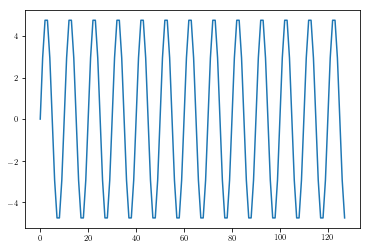

In [7]:
A = 5
N = 10
T = 127
M = 8

n = np.arange(T+1)
f = A * np.sin((2*np.pi*n)/N)


plt.figure()
plt.plot(n, f)

constant = A/np.sqrt(2*M+1)

F = np.zeros(len(n), dtype='complex128')
for nn in np.arange(M, (T-M)+1):
#     print nn
#     sin_cos = 0
#     sin_sin = 0
    for k, m in enumerate(np.arange(-M, M+1)):
#         print k, m
        sin_cos = np.sin((2*np.pi*(nn+m))/N) * np.cos((2*np.pi*k*m)/(2*M+1))
        sin_sin = np.sin((2*np.pi*(nn+m))/N) * np.sin((2*np.pi*k*m)/(2*M+1))
#         print sin_cos, sin_sin
#     F[nn] = constant * sin_cos - 1j * constant* sin_sin
        
# plt.figure()
# plt.plot(n, np.real(F))

# plt.figure()
# plt.plot(n, np.imag(F))

# plt.figure()
# plt.plot(n, np.abs(F))

# plt.figure()
# plt.plot(n, np.angle(F))

(64,) (64,)


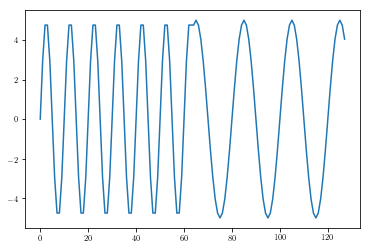

In [8]:
A = 5
N1 = 10
N2 = 20
T1 = 63
T = 127
M = 8

n = np.arange(T+1)
f1 = A * np.sin((2*np.pi*n)/N1)
f2 = A * np.sin((2*np.pi*n)/N2)

print f1[0:T1+1].shape, f2[T1+1:T+1].shape
f = np.hstack((f1[0:T1+1], f2[T1+1:T+1]))

plt.figure()
plt.plot(n, f)

constant = A/np.sqrt(2*M+1)

F = np.zeros(len(n), dtype='complex128')
for nn in np.arange(M, (T-M)+1):
#     print nn
#     sin_cos = 0
#     sin_sin = 0
    for k, m in enumerate(np.arange(-M, M+1)):
#         print k, m
        sin_cos = np.sin((2*np.pi*(nn+m))/N1) * np.cos((2*np.pi*k*m)/(2*M+1))
        sin_sin = np.sin((2*np.pi*(nn+m))/N1) * np.sin((2*np.pi*k*m)/(2*M+1))
#         print sin_cos, sin_sin
#     F[nn] = constant * sin_cos - 1j * constant* sin_sin
        
# plt.figure()
# plt.plot(n, np.real(F))

# plt.figure()
# plt.plot(n, np.imag(F))

# plt.figure()
# plt.plot(n, np.abs(F))

# plt.figure()
# plt.plot(n, np.angle(F))

## Gabor functions